In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Data Processing

In [2]:
df=pd.read_csv('financial_data.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.shape #(rows,columns)

(6362620, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
step              int64
type              object
amount            float64
nameOrig          object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest          object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           int64
isFlaggedFraud    int64
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
corr=df.corr()
corr

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


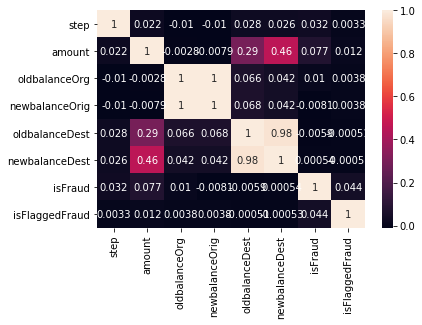

In [9]:
sns.heatmap(corr,annot=True)

In [10]:
df.sample(frac=0.05,random_state=1000)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5878792,403,PAYMENT,3466.54,C992981827,0.00,0.00,M1983905308,0.00,0.00,0,0
1583306,155,CASH_OUT,310449.94,C456306744,29366.00,0.00,C772837677,0.00,310449.94,0,0
5942942,405,PAYMENT,4540.71,C1782705864,71191.72,66651.01,M749183122,0.00,0.00,0,0
4030226,299,CASH_IN,13785.38,C583618723,798856.41,812641.79,C696041973,244523.87,230738.49,0,0
1599018,156,CASH_IN,307754.06,C1993990246,2982265.07,3290019.13,C1821092338,1471589.34,1163835.28,0,0
6019113,455,CASH_IN,97326.16,C292084629,0.00,97326.16,C681399721,5250123.75,5152797.59,0,0
5299762,373,TRANSFER,804205.85,C1902460118,40103.00,0.00,C886083258,410073.98,1214279.83,0,0
5879951,403,CASH_OUT,158979.22,C508289896,0.00,0.00,C286075792,678598.95,837578.17,0,0
3755176,279,CASH_OUT,297057.21,C369168253,81176.00,0.00,C1598397795,0.00,297057.21,0,0
850280,41,PAYMENT,12129.05,C610604153,552471.00,540341.95,M246118692,0.00,0.00,0,0


## Feature Engineering

In [11]:
orig_acc_name=pd.unique(df['nameOrig'])
orig_acc_name

array(['C1231006815', 'C1666544295', 'C1305486145', ..., 'C1162922333',
       'C1685995037', 'C1280323807'], dtype=object)

In [12]:
new_df=df.groupby(["nameOrig","type"]).count().reset_index()

In [13]:
new_df.head()

,nameOrig,type,step,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,C1000000639,CASH_OUT,1,1,1,1,1,1,1,1,1
1,C1000001337,PAYMENT,1,1,1,1,1,1,1,1,1
2,C1000001725,PAYMENT,1,1,1,1,1,1,1,1,1
3,C1000002591,CASH_IN,1,1,1,1,1,1,1,1,1
4,C1000003372,CASH_IN,1,1,1,1,1,1,1,1,1


In [14]:
new_df.shape

(6359874, 11)

In [15]:
df.nameOrig.value_counts()

C1902386530    3
C1530544995    3
C1462946854    3
C545315117     3
C2098525306    3
C363736674     3
C400299098     3
C1677795071    3
C1784010646    3
C2051359467    3
C1065307291    3
C724452879     3
C1976208114    3
C1999539787    3
C1832548028    3
C1749790850    2
C461087756     2
C1090722085    2
C785228432     2
C1906175536    2
C1501854241    2
C1471725879    2
C81330894      2
C1494691984    2
C1023171688    2
C1182523157    2
C1837511542    2
C77405061      2
C427152663     2
C1427859495    2
              ..
C1864487054    1
C55674037      1
C1600834796    1
C1087928383    1
C1348142287    1
C779546590     1
C885854871     1
C883636541     1
C544630345     1
C239828055     1
C337806799     1
C1957182205    1
C29557803      1
C1128174165    1
C1310515981    1
C1362474732    1
C1219647554    1
C695495897     1
C2047069389    1
C144594016     1
C316505942     1
C1587182605    1
C382423308     1
C155765308     1
C947232088     1
C1612039200    1
C916952759     1
C1501665005   

In [16]:
df['amount'].value_counts()

10000000.00    3207
10000.00         88
5000.00          79
15000.00         68
500.00           65
100000.00        42
21500.00         37
120000.00        29
135000.00        20
0.00             16
1711.67           9
4546.07           9
2431.38           9
2152.26           9
8661.00           9
10180.18          9
4648.12           9
213.86            9
5047.67           9
3748.95           9
1498.47           8
5181.37           8
4138.20           8
3142.59           8
3458.56           8
3246.11           8
3096.48           8
6257.73           8
1228.19           8
6650.06           8
               ... 
20725.39          1
72536.20          1
249370.45         1
227828.48         1
436675.87         1
20746.61          1
182775.81         1
13823.71          1
467754.37         1
12062.56          1
20714.89          1
590600.34         1
129717.09         1
94970.33          1
72540.95          1
13568.54          1
117079.70         1
249362.70         1
5007.60           1


This shows that the amount ranges from rs. 2 to rs. 10000000(1 crore). 
Now we can arrange the data according to the range of the amount that has been transferred or withdrawn from one
account to another!


In [17]:
(((df['isFlaggedFraud']==1) & (df['isFraud']==0))==True).sum()


0

#### by the above row, we conclude that if a row has been flagged fraud i.e. if the user is trying to transfer more than
#### the amount of Rs. 200,000 then it is marked fraud only and there is no ambiguity regarding it is fraud or not


#### hence we can now drop the column isFlaggedFraud because it makes no difference to the marked fraudulent transactions.

In [18]:
df=df.drop(df.columns[10],axis=1)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [19]:
payment_mode=pd.unique(df['type'])
payment_mode

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

linear regression with multiple variables

In [20]:
step_df=pd.unique(df['step']).shape
step_df


(743,)

# LOGISTIC REGRESSION

In [21]:
#importing train_test model
from sklearn.model_selection import train_test_split

In [22]:
from sklearn import linear_model

In [23]:
x=df[['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']]

In [24]:
y=df[['isFraud']]

In [25]:
X_train,X_test,y_train,y_test=train_test_split(x, y, test_size=0.20, random_state=100)

In [26]:
X_test.head(3)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
3763599,279,171969.53,10569769.59,10741739.12,2056990.02,1885020.49
1595120,156,144349.09,4854638.70,4998987.80,236788.54,92439.44
17629,8,154612.31,12450461.14,12605073.45,244360.74,324294.59


In [27]:
y_test.head(3)

,isFraud
3763599,0
1595120,0
17629,0


In [28]:
y_train.head(3)

,isFraud
137033,0
4335881,0
1801366,0


In [29]:
X_train.head(3)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
137033,11,13850.15,55658.0,41807.85,169311.01,183161.17
4335881,308,44071.50,27408.0,0.00,0.00,0.00
1801366,162,333908.94,30887.0,0.00,534481.68,868390.62


In [30]:
model=linear_model.LinearRegression()

In [31]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
y_pred=model.predict(X_test)
y_pred

array([[-0.00072898],
       [-0.00493329],
       [-0.0015607 ],
       ...,
       [ 0.00248043],
       [ 0.00358919],
       [ 0.00411353]])

In [33]:
con_df=pd.DataFrame(y_test['isFraud'])
con_df['predicted_fraud']=y_pred
con_df.columns=['y_test','predicted_fraud']
# con_df=con_df.reset_index().drop('index',axis=1)
con_df[con_df['y_test']==1]

,y_test,predicted_fraud
6358067,1,0.210957
1070139,1,0.063356
1707590,1,1.010080
6351226,1,0.004333
6020345,1,0.125825
4182991,1,0.006455
3257998,1,0.039770
2250316,1,0.207382
2755033,1,0.037800
5072055,1,0.540844


In [34]:
from sklearn import metrics
print("MSE",metrics.mean_squared_error(y_test,y_pred))
print("MAE",metrics.mean_absolute_error(y_test,y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


MSE 0.0010809234948843816
MAE 0.0064416537305604935
RMSE 0.03287740097520456


In [35]:
# metrics.accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred.round(), normalize=True)


0.998833813743395

#### Thus the accuracy of the project is 99.8%

# EDA

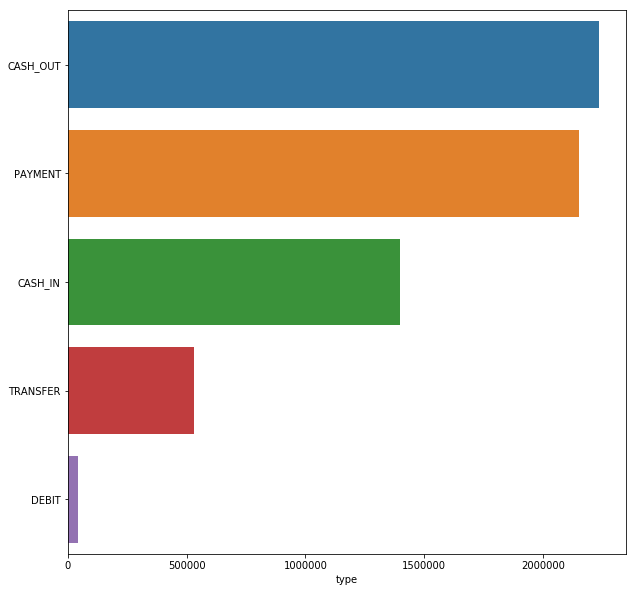

In [36]:
plt.figure(figsize=(10,10))
data=df['type'].value_counts().head(15)
sns.barplot(y=data.index, x=data)

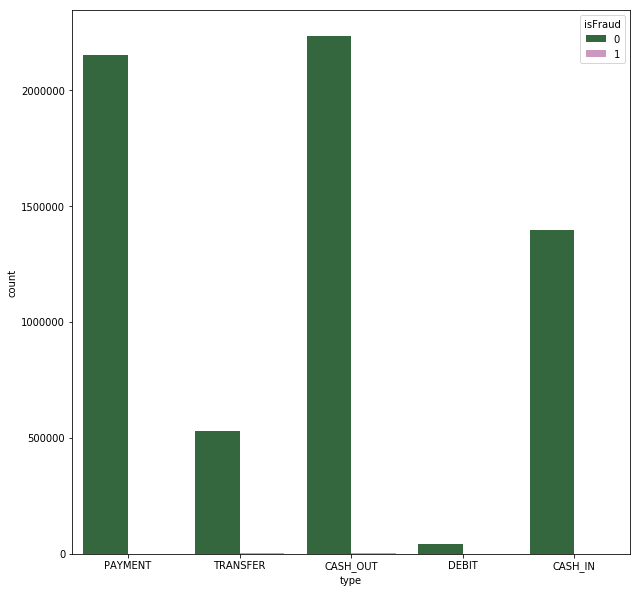

In [37]:
plt.figure(figsize=(10,10))
sns.countplot(x='type',hue='isFraud',data=df,palette='cubehelix')

In [38]:
plt.figure(figsize=(20,10))
df.hist(z 

SyntaxError: unexpected EOF while parsing (<ipython-input-38-7ecf32cbb720>, line 2)